## 군집평가 

- 군집화는 분류와 유사해보일 수 있겠지만 성격이 다르다
- 데이터 내에 숨어 있는 별도의 그룹을 찾아서 의미를 부여하거나 동일한 분류 값에 속하더라도 그 안에서 더 세분화된 군집화를 추구하거나 서로 다른 분류 값의 데이터도 더 넓은 군집화 레벨화 등의 영역을 가지고 있다. 

## 실루엣 분석 : 군집화 평가 방법
- 각 군집 간의 거리가 얼마나 효율적으로 분리돼있는지 나타냄
> 효율적: 다른 군집과의 거리는 떨어져 있고, 동일 군집끼리의 데이터는 가깝게 뭉쳐있음 / 개별 군집은 비슷한 정도의 여유공간을 가지고 떨어져 있을 것임 

- 실루엣 계수 기반 : 개별 데이터가 가지는 군집화 지표 ( 해당 데이터가 같은 군집 내에서는 얼마나 가까운지 / 다른 군집과는 얼마나 멀리 있는지 ) 

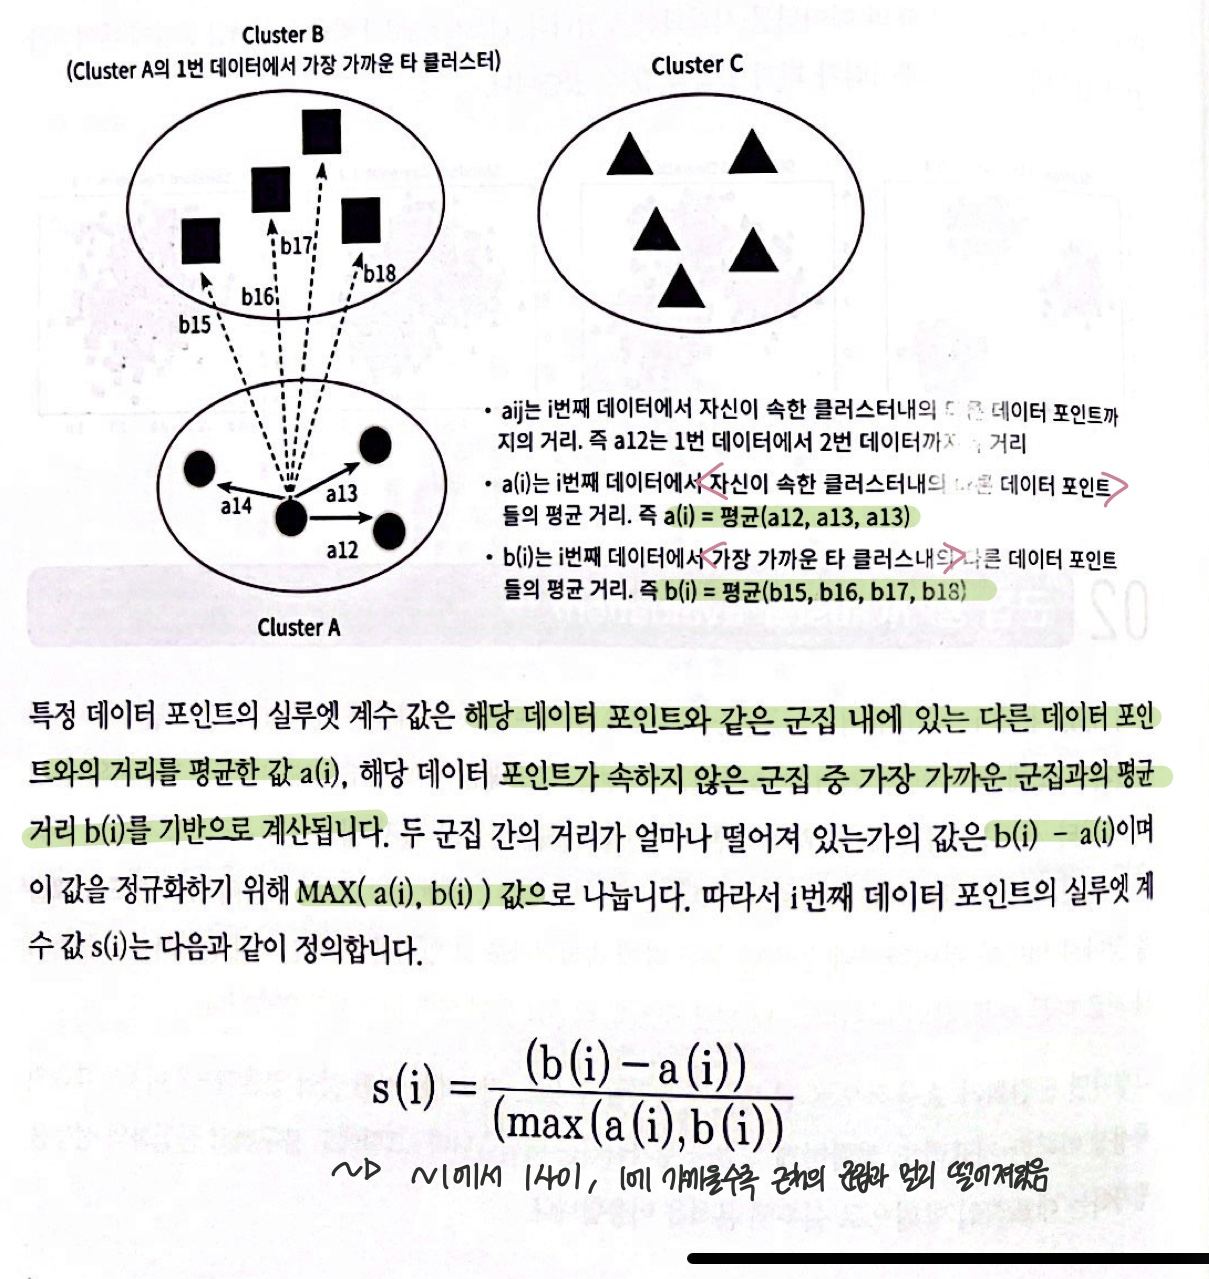

### 사이킷런 실루엣 점수 계산 메소드 

- 각 데이터 포인트의 실루엣 계수 계산 메소드 <br>
: 주어진 데이터와 클러스터 레이블을 기반으로 각 데이터 포인트의 실루엣 계수를 계산하여 반환합니다. 반환값은 각 데이터 포인트에 대한 실루엣 계수로 이루어진 1차원 배열입니다 <br>
> 각 데이터 포인트의 실루엣 계수 > 데이터 포인트의 개별적인 군집 품질 평가 가능<br>

`sklearn.metrics.silhouette_samples(X, labels, *, metric='euclidean', **kwds)` <br>
X: 클러스터링에 사용되는 데이터 배열입니다.<br>
labels: 데이터 포인트의 클러스터 레이블을 나타내는 배열이나 리스트입니다.<br>
metric: 거리 계산에 사용되는 메트릭(metric)을 지정합니다. 기본값은 'euclidean'이며, 다른 메트릭으로는 'manhattan', 'cosine' 등을 선택할 수 있습니다.

- 실루엣 점수 계산 메소드 <br>
`sklearn.metrics.silhouette_score(X, labels, *, metric='euclidean', sample_size=None, random_state=None, **kwds)`

X: 클러스터링에 사용되는 데이터 배열입니다. <br>
labels: 데이터 포인트의 클러스터 레이블을 나타내는 배열이나 리스트입니다.<br>
metric: 거리 계산에 사용되는 메트릭(metric)을 지정합니다. 기본값은 'euclidean'이며, 다른 메트릭으로는 'manhattan', 'cosine' 등을 선택할 수 있습니다.<br>
sample_size: 계산에 사용할 샘플의 개수를 지정합니다. 기본값은 None으로, 전체 데이터를 사용합니다. 큰 데이터셋의 경우 일부 샘플만 사용하여 계산 속도를 향상시킬 수 있습니다.<br>
random_state: 난수 발생 시드를 설정합니다


### 좋은 군집화의 조건
- 전체 실루엣 계수의 평균값이 0~1 사이의 값을 가지며, 1에 가까울수록 좋음
- 개별 군집의 평균값의 편차가 크지 않아야 함.(개별 군집의 실수엣 계수 평균값이 전체 실루엣 계수의 평균값에서 크게 벗어나지 않는 것이 중요 = 한 군집만 너무 높아서 전체 평균값을 높이는게 좋지 않다는 뜻)

### 붓꽃(Iris) 데이터 셋을 이용한 클러스터 평가

In [3]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
# 실루엣 분석 metric 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0).fit(irisDF)

irisDF['cluster'] = kmeans.labels_

# iris 의 모든 개별 데이터에 실루엣 계수값을 구함. 
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples( ) return 값의 shape' , score_samples.shape)

# irisDF에 실루엣 계수 컬럼 추가
irisDF['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수값을 구함. 
average_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터셋 Silhouette Analysis Score:{0:.3f}'.format(average_score))

irisDF.head(3)

silhouette_samples( ) return 값의 shape (150,)
붓꽃 데이터셋 Silhouette Analysis Score:0.553


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315


- 평균 실루엣 계수 0.553
- 앞에 세개는 높아보이지만 뒤에 갈수록 어떻게 되는지 모르니까 군집 칼럼별로 group by 하여 실루엣 계수 평균값 구해보자

In [4]:
irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

### 클러스터별 평균 실루엣 계수의 시각화를 통한 클러스터 개수 최적화 방법

In [5]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

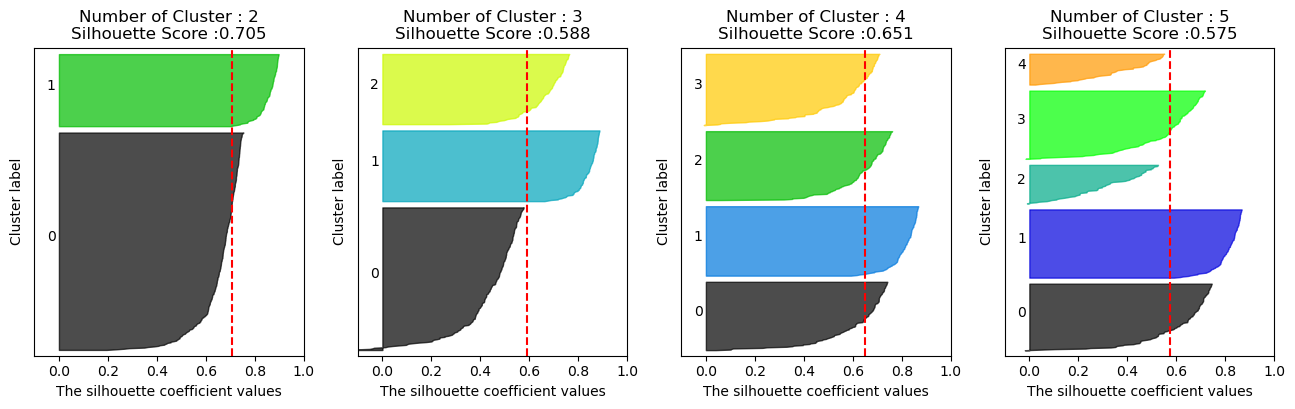

In [6]:
# make_blobs 을 통해 clustering 을 위한 4개의 클러스터 중심의 500개 2차원 데이터 셋 생성  
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, \
                  center_box=(-10.0, 10.0), shuffle=True, random_state=1)  

# cluster 개수를 2개, 3개, 4개, 5개 일때의 클러스터별 실루엣 계수 평균값을 시각화 
visualize_silhouette([ 2, 3, 4, 5], X)

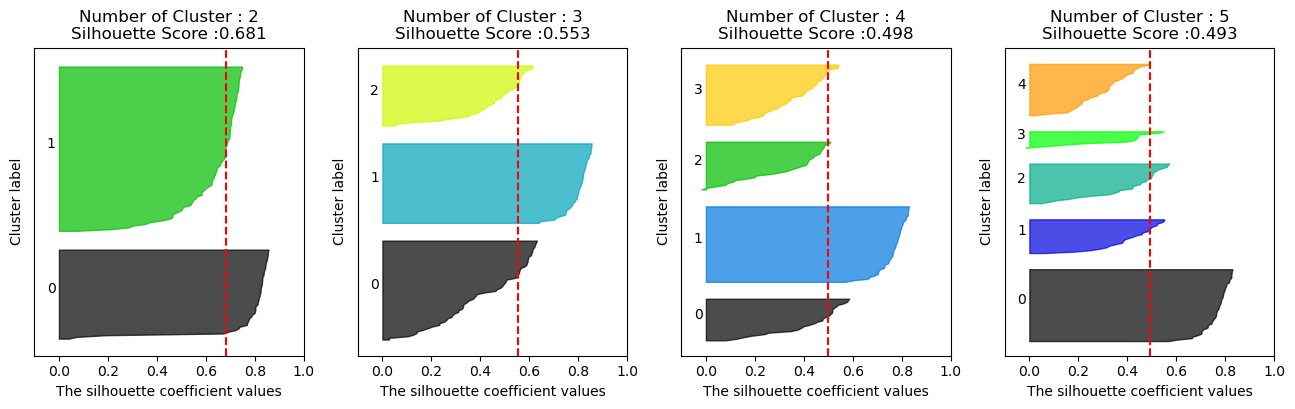

In [7]:
from sklearn.datasets import load_iris

iris=load_iris()
visualize_silhouette([ 2, 3, 4,5 ], iris.data)